In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import api_key
from datetime import datetime

In [18]:
# Create a set of random latitude and longitude combinations.
# keep size at 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(lat_lngs)

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-33.170637620476555, 59.2102017557946),
 (-73.55519742458306, -25.28212911324337),
 (45.38172345054332, 120.52909298542784),
 (7.850359450685801, 131.06885038219792),
 (9.011379931490666, -166.7386461502927),
 (-0.1266458725179973, 109.33929739071931),
 (-32.50294982635001, 28.942909467958145),
 (33.07655107532338, -136.51236615377059),
 (6.344440271134459, 103.75064975038822),
 (20.756166135126023, -151.4368206687066),
 (19.462882208735067, 25.689734812122367),
 (-7.63801573173707, -58.43781753923565),
 (-78.29899091003222, 101.14232669777863),
 (52.33553272254275, 171.82121759245052),
 (-49.65995030323819, -30.037885348427068),
 (-81.75223014918143, 55.570005424001835),
 (-21.899864201912237, -11.354209492455652),
 (52.26450620457558, 101.23946501915441),
 (-63.04034861864531, 45.16822743651409),
 (-56.38904654206535, 14.726291923974031),
 (19.058417182904435, -135.4034609929453),
 (33.01388208320441, 38.961125246323235),
 (59.35256706919097, 61.05750309314175),
 (21.60480524644408

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [21]:
# Create an endpoint URL for a city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city_name in enumerate(cities):
# Build query URL
    city_name = city_name.replace(" ","+")
    query_url = url + "q=" + city_name + "&appid=" + api_key + "&units=" + units
    try:
        response = requests.get(query_url).json()
        country = response["sys"]["country"]
        date = response["dt"]
        date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        lon = response["coord"]["lon"]
        lat = response["coord"]["lat"]
        max_temp = response["main"]["temp_max"]
        humidity =  response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        
        city_data.append({"City": city_name.title(),
                          "Lat": lat,
                          "Lng": lon,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
    except:
        print(f"{city_name} weather not found.")
        continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
wulanhaote weather not found.
illoqqortoormiut weather not found.
kawana+waters weather not found.
belushya+guba weather not found.
solovetskiy weather not found.
nguiu weather not found.
nizhneyansk weather not found.
gurskoye weather not found.
vaitupu weather not found.
barentsburg weather not found.
karkaralinsk weather not found.
taolanaro weather not found.
grand+river+south+east weather not found.
tasbuget weather not found.
meyungs weather not found.
satitoa weather not found.
sliac weather not found.
kamenskoye weather not found.
burica weather not found.
saleaula weather not found.
hihifo weather not found.
grand+centre weather not found.
kadykchan weather not found.
haibowan weather not found.
sentyabrskiy weather not found.
bolonchen weather not found.
tsihombe weather not found.
mys+shmidta weather not found.
amderma weather not found.
attawapiskat weather not found.
tumannyy weather not found.
suao weather not fo

In [24]:
city_weather_df = pd.DataFrame(city_data)

In [25]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,74.79,80,55,5.97,RE,2021-05-27 16:04:11
1,Ushuaia,-54.8000,-68.3000,29.46,80,90,3.29,AR,2021-05-27 16:00:28
2,Kloulklubed,7.0419,134.2556,79.30,78,44,12.44,PW,2021-05-27 16:04:12
3,Kapaa,22.0752,-159.3190,71.92,72,40,8.30,US,2021-05-27 16:04:12
4,Pontianak,-0.0333,109.3333,80.58,89,40,2.62,ID,2021-05-27 16:01:42


In [27]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_weather_df = city_weather_df[column_order]
city_weather_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-05-27 16:04:11,-21.3585,55.7679,74.79,80,55,5.97
1,Ushuaia,AR,2021-05-27 16:00:28,-54.8000,-68.3000,29.46,80,90,3.29
2,Kloulklubed,PW,2021-05-27 16:04:12,7.0419,134.2556,79.30,78,44,12.44
3,Kapaa,US,2021-05-27 16:04:12,22.0752,-159.3190,71.92,72,40,8.30
4,Pontianak,ID,2021-05-27 16:01:42,-0.0333,109.3333,80.58,89,40,2.62


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_weather_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_weather_df["Lat"]
max_temps = city_weather_df["Max Temp"]
humidity = city_weather_df["Humidity"]
cloudiness = city_weather_df["Cloudiness"]
wind_speed = city_weather_df["Wind Speed"]

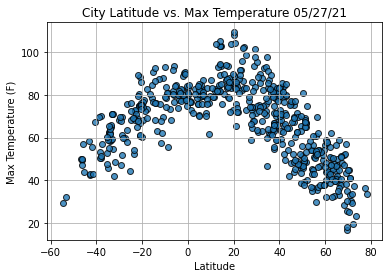

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor = "black",linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

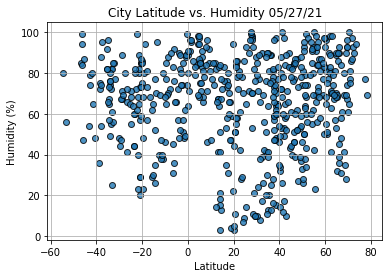

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

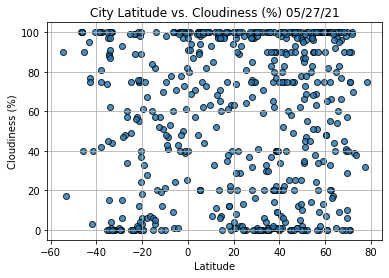

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

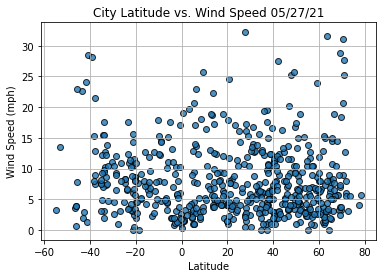

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
